In [1]:
import numpy as np
import yaml
import matplotlib.pyplot as plt

from math import sqrt, pi, tanh, cos, sin, tan, atan
from scipy.constants import speed_of_light
from shapely import Point, MultiPoint, LineString, MultiLineString, Polygon, MultiPolygon
from shapely import affinity, get_coordinates, unary_union, ops, intersection_all, contains, difference, box, distance, union_all
from shapely.plotting import plot_line, plot_points, plot_polygon
from tabulate import tabulate

from zeroheliumkit import Entity, Structure
from zeroheliumkit.geometries import *

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
with open('params.yaml', 'r') as file:
    params = yaml.safe_load(file)

### **RES uChannels** 

In [ ]:
RES_length = 700
RES_spacing = 16
RES_width = 10
RES_num_channels = 9
RES_gap = 3
RES_layer_info = {"layer_metal": RES_width/2 - RES_gap,
                  "layer_etch": RES_width/2}
reservior = uChannels(length=RES_length, 
                      spacing=RES_spacing, 
                      num=RES_num_channels, 
                      layers=RES_layer_info)

fig = plt.figure(1, figsize=SIZE, dpi=90)
ax = fig.add_subplot(111)
reservior.plot(ax=ax, layer=["all"])
plt.gca().set_aspect('equal')
plt.show()

### **Taper**

In [ ]:
cCH_length = 100
cCH_width = 7
cCH_gap = 0.5
cCH_extention = 5
layer_info = {"layer_metal": None,
              "layer_etch": (RES_gap, cCH_gap)}
tp = Taper(length=cCH_extention, 
           width1=RES_width-2*RES_gap, 
           width2=cCH_width-2*cCH_gap, 
           input_length=0.5, 
           output_length=1.0,
           anchors="flat", 
           layers=layer_info)
tp.scale(-1, 1, origin=(0,0))

fig = plt.figure(1, figsize=SIZE, dpi=90)
ax = fig.add_subplot(111)
tp.plot(ax=ax, layer=["all"])
plt.gca().set_aspect('equal')
plt.show()

### **Spiral Inductor** <a name="introduction"></a>

In [ ]:
SPI_width = 4
SPI_gap = 3
SPI_size = 200
SPI_num_turns = 6
SPI_arc_resolution = 0.5
layer_info = {"layer_metal": SPI_width,
              "layer_etch": SPI_width + 2*SPI_gap}
spI = SpiralInductor(size=SPI_size, 
                    width=SPI_width, 
                    gap=SPI_gap, 
                    num_turns=SPI_num_turns, 
                    smallest_section_length=SPI_arc_resolution,
                    layers=layer_info)

fig = plt.figure(1, figsize=SIZE, dpi=90)
ax = fig.add_subplot(111)
spI.plot(ax=ax, layer=["all"])
plt.gca().set_aspect('equal')
plt.show()

spI.save_to_file("spiral_inductor")

### **IDC**

In [ ]:
SPI_width = 4
SPI_gap = 3
layer_info = {"layer_metal": SPI_width/2,
              "layer_etch": SPI_width/2 + SPI_gap}
idc = IDC(length=190, 
          spacing=16, 
          num=15, 
          layers=layer_info)

fig = plt.figure(1, figsize=SIZE, dpi=90)
ax = fig.add_subplot(111)
idc.plot(ax=ax, layer=["all"])
plt.gca().set_aspect('equal')
plt.show()

### **Straight Line**

In [ ]:
SPI_width = 4
SPI_gap = 3
layer_info = {"layer_metal": SPI_width/2,
              "layer_etch": SPI_width/2 + SPI_gap}
line = StraightLine(length=90,
                    layers=layer_info)

fig = plt.figure(1, figsize=SIZE, dpi=90)
ax = fig.add_subplot(111)
line.plot(ax=ax, layer=["all"])
plt.gca().set_aspect('equal')
plt.show()

### **Fillet**

In [ ]:
layer_info = {"layer_metal": SPI_width/2,
              "layer_etch": SPI_width/2 + SPI_gap
              }
fl = Fillet(length1=50, 
            length2=50, 
            radius=10, 
            direction=120, 
            num_segments=30, 
            layers=layer_info)

fig = plt.figure(1, figsize=SIZE, dpi=90)
ax = fig.add_subplot(111)
fl.plot(ax=ax, layer=["all"])
plt.gca().set_aspect('equal')
plt.show()

### **Route between 2 points**

In [ ]:
layer_info = {"layer_metal": 1,
              "layer_etch": 2
              }

p1 = Point (-1422.3998, -80)
p2 = Point(-1350, -26.3)

route = Route(p1, 20, p2, 90, radius=20, num_segments=9, layers=layer_info)

fig = plt.figure(1, figsize=SIZE, dpi=90)
ax = fig.add_subplot(111)

route.plot(ax=ax, layer=["all"])
plot_points(p1, ax=ax)
plot_points(p2, ax=ax)

plt.grid()

plt.gca().set_aspect('equal')
plt.show()

In [ ]:
PINCH_gate_width = 20.0
PINCH_gate_leg = 8.0
PINCH_gate_w = 1.0
PINCH_gate_g = 0.4
PINCH_gate_th = 4.0

pg = PinchGate(width=PINCH_gate_w, leg=PINCH_gate_leg, length=PINCH_gate_width, w_gate=PINCH_gate_th)
layer_info = {"layer_top": pg,
              "layer_gnd": pg.buffer(PINCH_gate_g, join_style="mitre"),
              "anchors": MultiPoint([(0,0), (PINCH_gate_leg + PINCH_gate_th, 0)])
              }
pgate = GeometryCollection(layers=layer_info)

fig = plt.figure(1, figsize=SIZE, dpi=90)
ax = fig.add_subplot(111)

pgate.plot(ax=ax, layer=["all"])

plt.grid(alpha=0.2)
plt.gca().set_aspect('equal')
plt.show()

In [ ]:
RES_length = 100
RES_spacing = 16
RES_width = 10
RES_num_channels = 9
RES_gap = 3
RES_layer_info = {"layer_metal": RES_width/2 - RES_gap,
                  "layer_etch": RES_width/2
                 }

reservior = uChannelsAngle(
                    length=RES_length, 
                    spacing=RES_spacing, 
                    num=RES_num_channels, 
                    angle=15,
                    layers=RES_layer_info
                    )

fig = plt.figure(1, figsize=SIZE, dpi=90)
ax = fig.add_subplot(111)
reservior.plot(ax=ax, layer=["all"])
#set_limits(ax=ax, coor=[130, 100], dxdy=[30,30])
plt.gca().set_aspect('equal')
plt.show()

### **RouteTwoElbows**

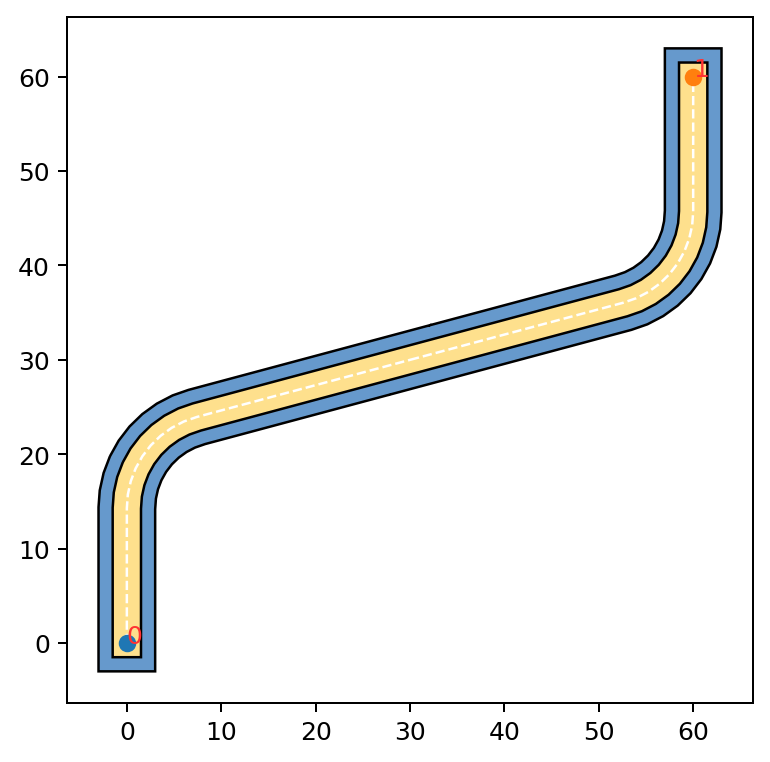

In [5]:
layer_info = {"layer_metal": 3,
              "layer_etch": 6
              }

p1 = Point(0, 0)
p2 = Point(60, 60)

r2 = RouteTwoElbows(p1, 90, p2, 90, 15, radius=10, num_segments=10, layers=layer_info)

fig = plt.figure(1, figsize=SIZE, dpi=90)
ax = fig.add_subplot(111)

r2.plot(ax=ax, layer=["all"])
plot_points(p1, ax=ax)
plot_points(p2, ax=ax)

plt.gca().set_aspect('equal')
plt.show()

### **CPW Resontaor**

In [7]:
def construct_resonator_skeletone(params: dict, init_point: Point) -> LineString:
    
    r = params['geom_params']['radius']
    n = params['geom_params']['num']
    w = params['geom_params']['w']
    g = params['geom_params']['g']
    b_x = params['geom_params']['box_x'] - 2 * r
    b_y = params['geom_params']['box_y']/2 - r
    x0 = init_point.x
    y0 = init_point.y
    
    eps_eff = calculate_eps_eff_from_geometry(substrate_epsR = params["substrate_eps"],
                                              w = w,
                                              g = g,
                                              substrate_height = params["substrate_h"])
    Z0 = calculate_impedance(w, g, eps_eff)
    length = calculate_resonator_length(params["type"], eps_eff, params["frequency"])
    print(tabulate([["f0", "length", "eps_eff", "impedance"], 
                    [params["frequency"], round(length, 2), round(eps_eff, 2), round(Z0, 2)]]))
    
    d_e = b_y - 4 * r * n
    d_b = (length/2 - (b_y + pi * r + b_x + n * 2 * pi * r + d_e))/2/n
    if d_b < 0 or d_e < 0:
        raise Exception("Incorrect geometry input. Choose different 'radius', 'x_length', 'y_height' or 'num'")

   
    e = Entity()
    e.add_line(LineString([(x0, y0), (x0, b_y)]))
    e.add_line(ArcLine(r, 0, r, 180, 90, 50))
    e.add_line(LineString([(0, 0), (b_x - d_b/2, 0)]))
    for i in range(n):
        e.add_line(Meander(d_b, r, direction=-90, num_segments=100))
    e.add_line(LineString([(0, 0), (d_b/2, 0)]))
    e.add_line(ArcLine(0, -r, r, 90, 0, 50))
    e.add_line(LineString([(0, 0), (0, -d_e)]))

    e_mirrored = affinity.scale(e.skeletone, xfact=1, yfact=-1, origin=(0,0))

    return merge_lines_with_tolerance(e.skeletone, e_mirrored, tol=1e-2)

In [43]:
rp = params["resonator"]
rp_geom = rp["geometry"]
resonator_params = {'type': rp["type"],
                    'frequency': rp["frequency"],
                    'substrate_eps': rp["eps"],
                    'substrate_h': rp["substrate_h"],
                    'geom_params': {'w': rp_geom["w"],
                                    'g': rp_geom["g"],
                                    'box_x': 1400, 
                                    'box_y': 1200,
                                    'radius': 60, 
                                    'num': 2}}
resonator_sk = construct_resonator_skeletone(resonator_params, Point(0, 20))

resonator = GeometryCollection(layers={"top": resonator_sk.buffer(rp_geom["w"], cap_style="flat", join_style="mitre"),
                                       "gnd": resonator_sk.buffer(rp_geom["w"] + 2*rp_geom["g"], cap_style="flat", join_style="mitre")})

p1 = Point(0, 20)
p2 = Point(rp_geom["box_x"] - rp_geom["radius"], rp_geom["box_y"]/2 - rp_geom["radius"])

resonator.add_anchor([p1, p2])

---  -------  -------  ---------
f0   length   eps_eff  impedance
6.5  9414.62  6.0      92.58
---  -------  -------  ---------


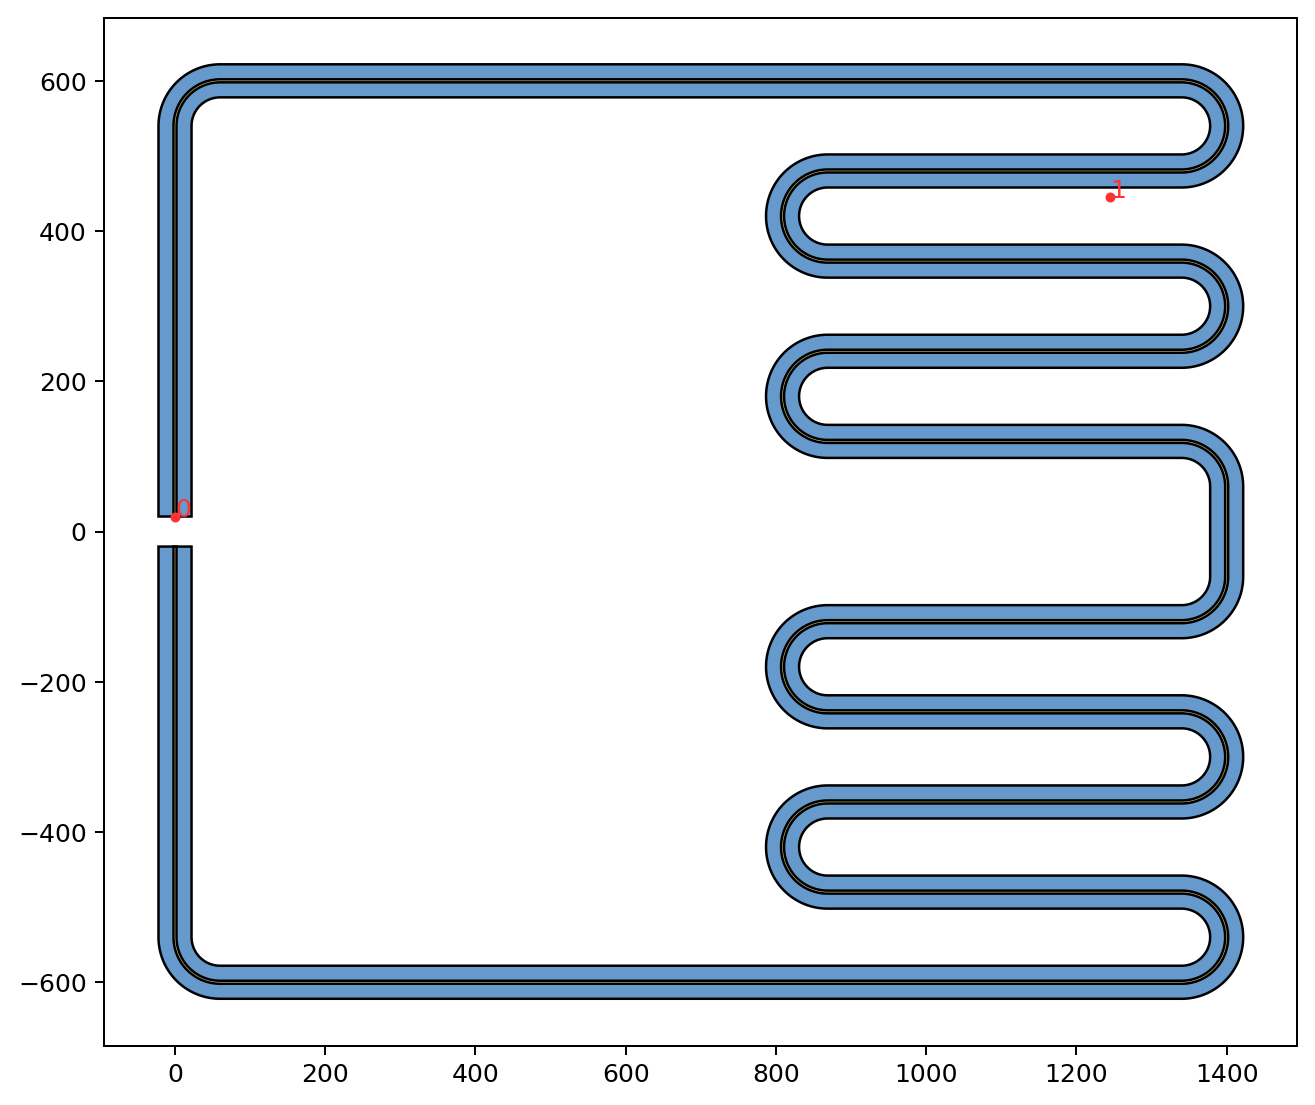

In [44]:
fig = plt.figure(1, figsize=SIZE_L, dpi=90)
ax = fig.add_subplot(111)
resonator.plot(ax=ax, layer=["all"])
#plot_line(resonator_sk, ax=ax, add_points=False, ls="-", lw=2)
plt.gca().set_aspect('equal')
#plt.xlim(0, 1300)
plt.show()

### **CPW Launcher**

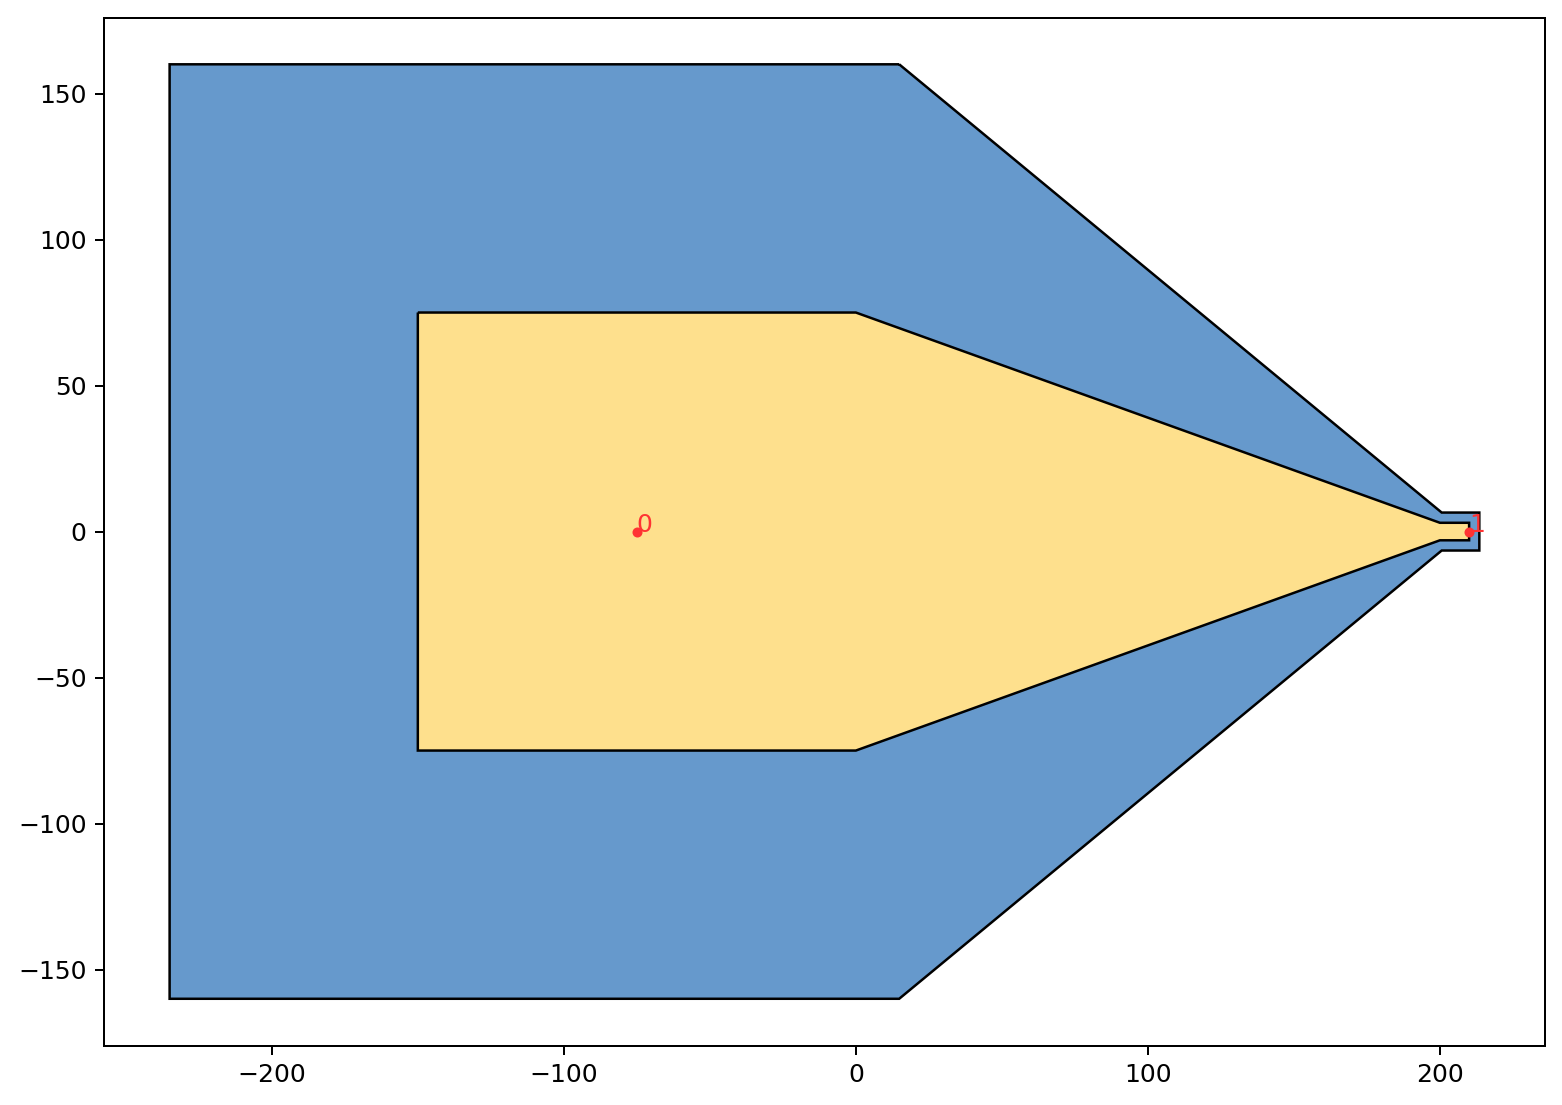

Geometries saved successfully.


In [51]:
cpwlauncher = Taper(length = 200,
                    width1 = 150,
                    width2 = 6,
                    input_length = 150,
                    output_length = 10,
                    anchors = "flat",
                    layers = {"top": None,
                              "gnd": (85, 3.5)})
cpwlauncher.anchors = MultiPoint([Point(-150/2, 0), cpwlauncher.anchors.geoms[1]])
cpwlauncher.skeletone = LineString()

fig = plt.figure(1, figsize=SIZE_L, dpi=90)
ax = fig.add_subplot(111)
cpwlauncher.plot(ax=ax, layer=["all"])
plt.gca().set_aspect('equal')
plt.show()

cpwlauncher.save_to_file("cpwrlauncher")